# Adult Dataset

Objective: To predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset

## Data Info

Data Set Characteristics: Multivariate <br>
Attribute Characteristics: Categorical, Integer <br>
Associated Tasks: Classification <br>
Number of Instances: 48842 <br>
Number of Attributes: 14 <br>
Missing Values? Yes <br>
Area: Social <br>
Date Donated to UCI Machine Learning Repository: 1996-05-01 <br>
Source od Data Set: UCI Machine Learning Repository <br>
Link to Data Set: https://archive.ics.uci.edu/ml/datasets/Adult


## Get the Data

### Download the Dataset

In [2]:
import pandas as pd
import numpy as np

adult_train = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
adult_test = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test")

The dataset has already been divided into the training set and the test set. We would not need to do a train_test_split anymore. adult_train represents the training set, while adult_test represents the test set.

### Take a Quick Look at the Data Structure

In [3]:
adult_train.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
adult_test.head()

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


The head function returns the first five rows of the dataset. It is observed that the dataset for both the training and test sets don't have column names. We would have to add column names.

In [5]:
# Get the column names
col_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
                          "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country",
                          "income"]

In [6]:
# Add col_names to the dataset

adult_train = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names = col_names)
adult_test = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names = col_names)

In [7]:
adult_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


We will use the info() method to get a quick description of the data, in particular the total number of rows, each attribute's type, and the number of nonnull values

In [9]:
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We were told that the dataset contains missing values. But from the result from the info() method, it shows that there are no missing values which is contradicting. We will see if the missing values have been replaced with "?" or something else.

In [10]:
# Let's check the values in workclass

adult_train["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

It is observed that 1836 are represented as "?" which should be the missing values. So we would change the "?" to missing values

In [11]:
adult_train = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                          names = col_names, sep=",\s", na_values=["?"], engine='python')

In [12]:
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
adult_train["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [14]:
adult_test = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", 
                         names = col_names, sep=",\s", na_values=["?"], engine='python')

In [15]:
adult_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16282 non-null  object 
 1   workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      15315 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16007 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [16]:
# Check the first 5 rows of the training dataset

adult_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
# Check the first 5 rows of the test datset

adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


For the test dataset, it is observed that the first row seems to be irrelevant or not useful, so we will take out the first row.

In [18]:
adult_test = adult_test.drop([0])

We have succesfully dropped the first row. Now, let's look at the first five rows again

In [19]:
adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [20]:
adult_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  object 
 1   workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      15315 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16007 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 2.0+ MB


We have 32,561 instances for the training dataset and 16,281 instances for the test dataset. There are some variables with missing values for both datasets of which we would take care of later. The dataset is made up of categorical and numerical attributes.

In [21]:
adult_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


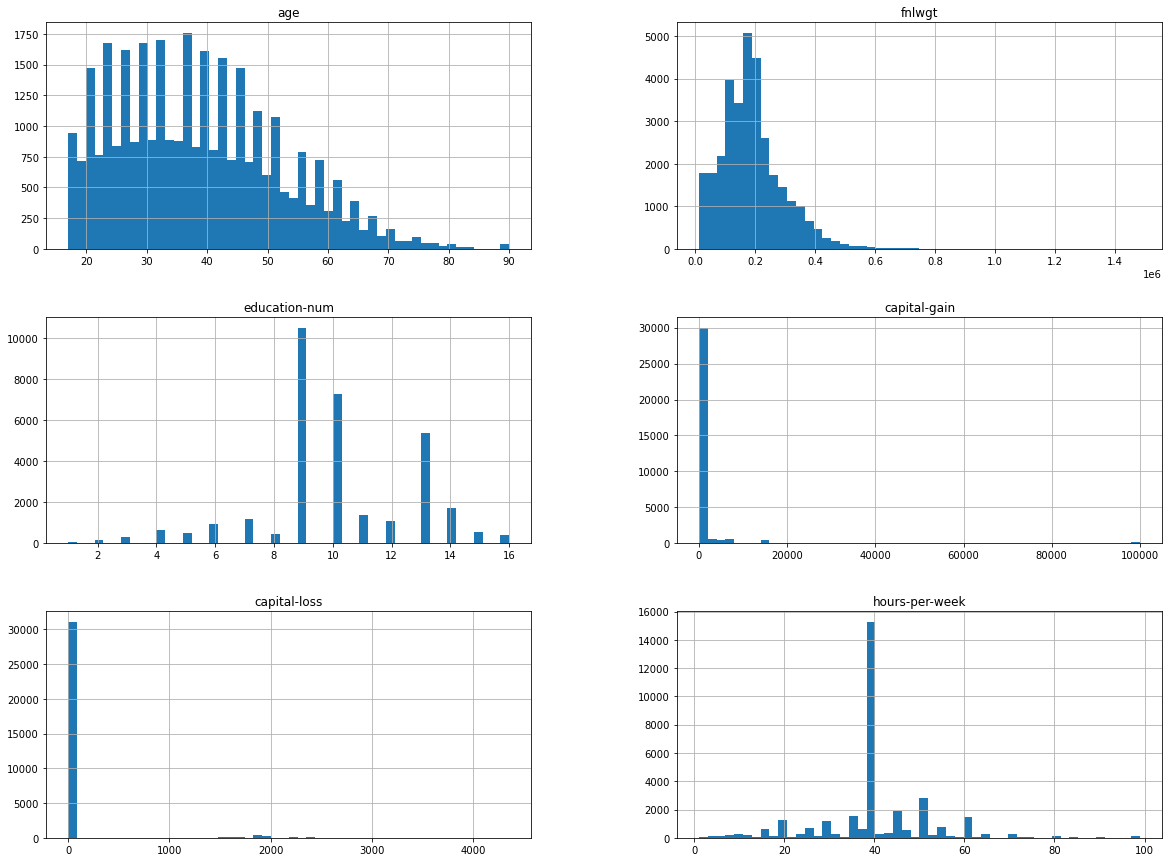

In [22]:
import matplotlib.pyplot as plt

adult_train.hist(bins = 50, figsize=(20,15))
plt.show()

# Discover and Visualize the Data to Gain Insights

## Looking for Correlations

In [23]:
adult_train.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


# Prepare the Data for Machine Learning Algorithms

In [24]:
X_train = adult_train.drop(["income"], axis=1)
y_train = adult_train["income"]

In [25]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


## Data Cleaning

## Training Dataset

In [26]:
X_train.columns[X_train.isnull().any()]

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [27]:
from sklearn.impute import SimpleImputer

imputer_cat = SimpleImputer(strategy="most_frequent")

In [28]:
imputer_cat.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [29]:
imputer_cat.statistics_

array([36, 'Private', 123011, 'HS-grad', 9, 'Married-civ-spouse',
       'Prof-specialty', 'Husband', 'White', 'Male', 0, 0, 40,
       'United-States'], dtype=object)

In [30]:
X = imputer_cat.transform(X_train)

In [31]:
X_train_tr = pd.DataFrame(X, columns=X_train.columns)

In [32]:
X_train_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  object
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  object
 11  capital-loss    32561 non-null  object
 12  hours-per-week  32561 non-null  object
 13  native-country  32561 non-null  object
dtypes: object(14)
memory usage: 3.5+ MB


Convert the label data from categorical to numeric values

In [33]:
y_train.replace(['<=50K', '>50K'], [0, 1], inplace=True)

In [34]:
y_train.value_counts()

0    24720
1     7841
Name: income, dtype: int64

### Handling Text and Categorical Attributes

Get to know which columns are categorical

In [35]:
cols = X_train.columns

num_cols = X_train._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [36]:
X_train_cat = X_train[cat_cols]

In [37]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
X_train_cat_1hot = cat_encoder.fit_transform(X_train_cat)
X_train_cat_1hot

<32561x102 sparse matrix of type '<class 'numpy.float64'>'
	with 260488 stored elements in Compressed Sparse Row format>

In [38]:
X_train_cat_1hot.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [39]:
cat_encoder.categories_

[array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 array(['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
        'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
        'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
        'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
        'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
        'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines',
        'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan',
        'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
        'Yugoslavia', nan], dtype=object),
 array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-

In [40]:
X_train_num = X_train[num_cols]

### Transformation Pipelines

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [42]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

X_train_prep = full_pipeline.fit_transform(X_train)

# Select and Train a Model

### Training and Evaluating on the Training Set

In [43]:
# Let's train using Stochastic Gradient Descent (SGD)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_prep, y_train)

SGDClassifier()

In [44]:
some_data = X_train[:20]
some_labels = y_train[:20]

some_data_prepared = full_pipeline.transform(some_data)
print("Pedictions:", sgd_clf.predict(some_data_prepared))
print("Labels:", list(some_labels))

Pedictions: [0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]


## Performance Measures

### Measusuring Accuracy using Cross-Validation

Let’s use the cross_val_score() function to evaluate your SGDClassifier model
using K-fold cross-validation, with three folds.

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train_prep, y_train, cv=3, scoring="accuracy")

array([0.84484982, 0.83941404, 0.84566479])

### Confusion Matrix

In [46]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_prep, y_train, cv=3)

In [47]:
# Get the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[23202,  1518],
       [ 3406,  4435]], dtype=int64)

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row considers the people that earn less or equal to 50k (the negative class): 23,078 of them were correctly classified as 0s (they are caleed true negatives), while the remaining 1,642 were wrongly classified as 1s (false positives). The second row considers the people that earn more than 50k represented as 1s (the positive class): 3,234 were wrongly classified as 0s (false negatives), while the remaining 4,607 were correctly classifed as 1s (true positives).

In [48]:
# Perfect Classifier

y_train_perfect_predictions = y_train # pretend we reached perfection
confusion_matrix(y_train, y_train_perfect_predictions)

array([[24720,     0],
       [    0,  7841]], dtype=int64)

### Precision and Recall

In [49]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred) 

0.7450025197379473

In [50]:
recall_score(y_train, y_train_pred) 

0.5656166305318199

In [51]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.6430332028418152

### Precision/Recall Tradeoff

In [52]:
y_scores = cross_val_predict(sgd_clf, X_train_prep, y_train, cv=3, method='decision_function')

In [53]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

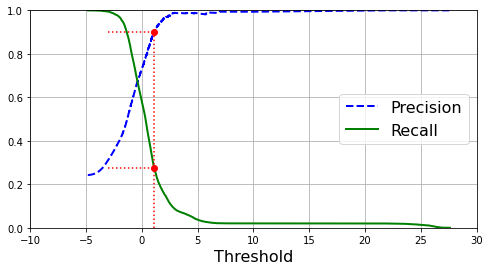

In [54]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)       
    plt.grid(True)                             
    plt.axis([-10, 30, 0, 1])            



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-3, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-3, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                                           
plt.show()

Plot Precision against Recall

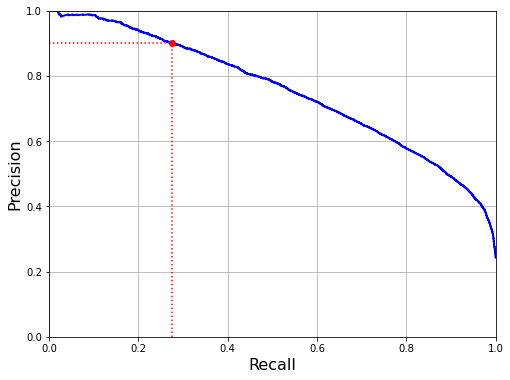

In [55]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

Let's decide to aim for 90% precision

In [56]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [57]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [58]:
precision_score(y_train, y_train_pred_90)

0.9

In [59]:
recall_score(y_train, y_train_pred_90)

0.2743272541767632

### The ROC Curve

To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the roc_curve() function:

In [60]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

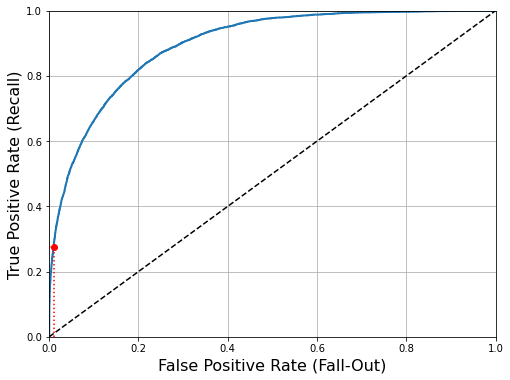

In [61]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
plt.show()

One way to compare classifiers is to measure the area under the curve (AUC).

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.8966105833621216

Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train_prep, y_train, cv=3, method="predict_proba")

But to plot a ROC curve, you need scores, not probabilities. A simple solution is to
use the positive class’s probability as the score:

In [64]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

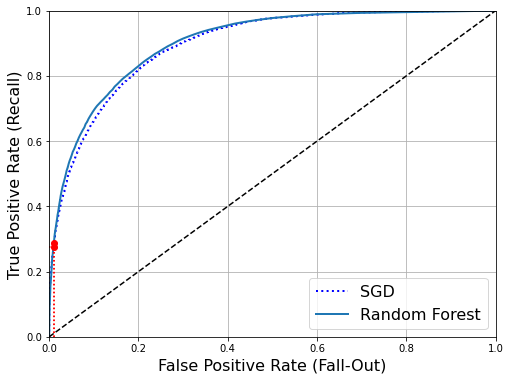

In [65]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [66]:
roc_auc_score(y_train, y_scores_forest)

0.9025954379910759

In [67]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train_prep, y_train, cv=3)

precision_score(y_train, y_train_pred_forest)

0.7328562909958258

In [68]:
recall_score(y_train, y_train_pred_forest)

0.6269608468307614

## Test Dataset

In [69]:
adult_test.columns[adult_test.isnull().any()]

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [70]:
from sklearn.impute import SimpleImputer

imputer_cat_test = SimpleImputer(strategy="most_frequent")

imputer_cat_test.fit(adult_test)

SimpleImputer(strategy='most_frequent')

In [71]:
imputer_cat_test.statistics_

array(['35', 'Private', 136986.0, 'HS-grad', 9.0, 'Married-civ-spouse',
       'Prof-specialty', 'Husband', 'White', 'Male', 0.0, 0.0, 40.0,
       'United-States', '<=50K.'], dtype=object)

In [72]:
trans_test = imputer_cat_test.transform(adult_test)

In [73]:
adult_test_tr = pd.DataFrame(trans_test, columns=adult_test.columns)

In [74]:
adult_test_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  object
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  object
 3   education       16281 non-null  object
 4   education-num   16281 non-null  object
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  object
 11  capital-loss    16281 non-null  object
 12  hours-per-week  16281 non-null  object
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: object(15)
memory usage: 1.9+ MB


In [75]:
adult_test_tr.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [76]:
X_test = adult_test_tr.drop(["income"], axis=1)
y_test = adult_test_tr["income"]

Create a custom transformer to make the number of columns equal for both the training and test sets after OneHotEncoding

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomOHE(BaseEstimator, TransformerMixin):
    def __init__(self, train_cols, cat_cols):
        self.train_cols = train_cols
        self.cat_cols = cat_cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X_test):
        
        ohe = OneHotEncoder()
        
        encoded_test = ohe.fit_transform(X_test[self.cat_cols]).toarray()
        test_size = encoded_test.shape[1]
        test_len = encoded_test.shape[0]
        
        diff = int(self.train_cols) - int(test_size)
        
        if diff > 0:
            a = np.zeros((test_len, diff))
            encoded_test = np.concatenate((encoded_test, a), axis = 1)
            
        return encoded_test

In [78]:
X_train_cols = X_train_prep.shape[1] - len(num_cols)

test_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', CustomOHE(X_train_cols, cat_cols), cat_cols)
     ])

X_test_prep = test_pipeline.fit_transform(X_test)

In [79]:
y_test.replace(['<=50K.', '>50K.'], [0, 1], inplace=True)

In [80]:
y_test.value_counts()

0    12435
1     3846
Name: income, dtype: int64

In [81]:
import lazypredict

In [82]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [83]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [10:21<00:00, 21.43s/it]


In [84]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.87               0.80     0.80      0.87   
LGBMClassifier                     0.87               0.80     0.80      0.87   
SGDClassifier                      0.83               0.78     0.78      0.83   
AdaBoostClassifier                 0.86               0.77     0.77      0.86   
RandomForestClassifier             0.85               0.77     0.77      0.85   
GaussianNB                         0.68               0.76     0.76      0.71   
ExtraTreesClassifier               0.84               0.76     0.76      0.84   
BernoulliNB                        0.74               0.75     0.75      0.75   
LogisticRegression                 0.85               0.75     0.75      0.84   
BaggingClassifier                  0.84               0.75     0.75      0.84   
CalibratedClassifierCV      

# FIne tune the models

### XGBClassifier

In [85]:
# import XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# declare parameters
params ={
    'objective': 'binary:logistic',
    'max_depth': 6,
    'alpha': 8,
    'learning_rate': 1.0,
    'n_estimators': 100
}

# instantiate the classifier
XGB_model = XGBClassifier(**params)

#fit the classifer to the training data
XGB_model.fit(X_train_prep, y_train)

XGBClassifier(alpha=8, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [86]:
XGB_y_predtr = XGB_model.predict(X_train_prep)

In [87]:
print('accuracy score:', accuracy_score(y_train, XGB_y_predtr))
print('roc_auc_score:',roc_auc_score(y_train, XGB_y_predtr))
print('f1_score:', f1_score(y_train, XGB_y_predtr))
print('precision_score:', precision_score(y_train, XGB_y_predtr))
print('recall_score:', recall_score(y_train, XGB_y_predtr))

accuracy score: 0.9071588710420442
roc_auc_score: 0.8508591415796729
f1_score: 0.7938348223419492
precision_score: 0.8531222515391381
recall_score: 0.7422522637418697


### SGD Classifier

In [88]:
# Let's train using Stochastic Gradient Descent (SGD)

from sklearn.linear_model import SGDClassifier

# declare parameters
params = {
    'loss': 'log',
    'penalty': 'l2',
    'n_iter_no_change': 1000
}

# instantiate the classifier
sgd_clf = SGDClassifier(**params)

#fit the classifer to the training data
sgd_clf.fit(X_train_prep, y_train)

SGDClassifier(loss='log', n_iter_no_change=1000)

In [89]:
sgd_y_predtr = sgd_clf.predict(X_train_prep)

In [90]:
print('accuracy score:', accuracy_score(y_train, sgd_y_predtr))
print('roc_auc_score:',roc_auc_score(y_train, sgd_y_predtr))
print('f1_score:', f1_score(y_train, sgd_y_predtr))
print('precision_score:', precision_score(y_train, sgd_y_predtr))
print('recall_score:', recall_score(y_train, sgd_y_predtr))

accuracy score: 0.8531679002487639
roc_auc_score: 0.770105497862245
f1_score: 0.6667131404670616
precision_score: 0.735239852398524
recall_score: 0.6098711898992475


### Random Forest Classifier

In [91]:
# import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# declare parameters
param_grid = [
    {'n_estimators': [30], 'max_features': [6, 8]},
    {'bootstrap': [False], 'n_estimators': [10], 'max_features': [4]},
]

forest_clf = RandomForestClassifier()

# instantiate the classifier
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

#fit the classifer to the training data
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [6, 8], 'n_estimators': [30]},
                         {'bootstrap': [False], 'max_features': [4],
                          'n_estimators': [10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [92]:
fin = grid_search.best_estimator_
grd_y_predtr = fin.predict(X_train_prep)

In [93]:
print('accuracy score:', accuracy_score(y_train, grd_y_predtr))
print('roc_auc_score:',roc_auc_score(y_train, grd_y_predtr))
print('f1_score:', f1_score(y_train, grd_y_predtr))
print('precision_score:', precision_score(y_train, grd_y_predtr))
print('recall_score:', recall_score(y_train, grd_y_predtr))

accuracy score: 0.9979730352261909
roc_auc_score: 0.9960525981800914
f1_score: 0.9957768108523163
precision_score: 0.9992294850391679
recall_score: 0.9923479148067849


### Logistic Regression

In [94]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# declare parameters
param_grid = {
    'max_iter':[1000],
    'solver': ['lbfgs'],
    'class_weight': ['balanced']
}

log_model = LogisticRegression()

# instantiate the classifier
grid_log = GridSearchCV(log_model, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

#fit the classifer to the training data
log_model.fit(X_train_prep, y_train)

LogisticRegression()

In [95]:
log_y_predtr = log_model.predict(X_train_prep)

In [96]:
print('accuracy score:', accuracy_score(y_train, log_y_predtr))
print('roc_auc_score:',roc_auc_score(y_train, log_y_predtr))
print('f1_score:', f1_score(y_train, log_y_predtr))
print('precision_score:', precision_score(y_train, log_y_predtr))
print('recall_score:', recall_score(y_train, log_y_predtr))

accuracy score: 0.8532907465986916
roc_auc_score: 0.7684883112747738
f1_score: 0.66507747318236
precision_score: 0.7385549672999066
recall_score: 0.6048973345236577


# Measure Performace on Test Set

### XGBClassifier

In [97]:
XGB_y_pred = XGB_model.predict(X_test_prep)

In [98]:
print('accuracy score:', accuracy_score(y_test, XGB_y_pred))
print('roc_auc_score:',roc_auc_score(y_test, XGB_y_pred))
print('f1_score:', f1_score(y_test, XGB_y_pred))
print('precision_score:', precision_score(y_test, XGB_y_pred))
print('recall_score:', recall_score(y_test, XGB_y_pred))

accuracy score: 0.8089797923960445
roc_auc_score: 0.6639288731983538
f1_score: 0.4903310390036053
precision_score: 0.6631205673758865
recall_score: 0.3889755590223609


### SGD Classifier

In [99]:
sgd_y_pred = sgd_clf.predict(X_test_prep)

In [100]:
print('accuracy score:', accuracy_score(y_test, sgd_y_pred))
print('roc_auc_score:',roc_auc_score(y_test, sgd_y_pred))
print('f1_score:', f1_score(y_test, sgd_y_pred))
print('precision_score:', precision_score(y_test, sgd_y_pred))
print('recall_score:', recall_score(y_test, sgd_y_pred))

accuracy score: 0.8172102450709416
roc_auc_score: 0.7014638993279876
f1_score: 0.5547576301615799
precision_score: 0.653276955602537
recall_score: 0.48205928237129486


### Random Forest Classifier

In [101]:
grd_y_pred = fin.predict(X_test_prep)

In [102]:
print('accuracy score:', accuracy_score(y_test, grd_y_pred))
print('roc_auc_score:',roc_auc_score(y_test, grd_y_pred))
print('f1_score:', f1_score(y_test, grd_y_pred))
print('precision_score:', precision_score(y_test, grd_y_pred))
print('recall_score:', recall_score(y_test, grd_y_pred))

accuracy score: 0.8169031386278484
roc_auc_score: 0.6314014780132822
f1_score: 0.4192480031170855
precision_score: 0.8360528360528361
recall_score: 0.2797711908476339


### Logistic Regression

In [103]:
log_y_pred = log_model.predict(X_test_prep)

In [104]:
print('accuracy score:', accuracy_score(y_test, log_y_pred))
print('roc_auc_score:',roc_auc_score(y_test, log_y_pred))
print('f1_score:', f1_score(y_test, log_y_pred))
print('precision_score:', precision_score(y_test, log_y_pred))
print('recall_score:', recall_score(y_test, log_y_pred))

accuracy score: 0.818500092131933
roc_auc_score: 0.6646837188324686
f1_score: 0.49270386266094424
precision_score: 0.7251136937847398
recall_score: 0.37311492459698387
